In [1]:
import pandas as pd
from scipy import stats
import rstoolbox as rs

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['svg.fonttype'] = 'none'

rs.utils.format_Ipython()

# Load Data

In [2]:
def load_data():
    alpha = rs.io.parse_rosetta_file('docking/amyloid_alpha/alpha_dock.minisilent.gz',
                                     {'scores_by_residue': ['residue_ddg_']})
    alpha = rs.utils.add_column(alpha, 'target', 'albumina')
    alpha = rs.utils.add_column(alpha, 'binder', 'alpha')
    beta  = rs.io.parse_rosetta_file('docking/amyloid_beta/beta_dock.minisilent.gz',
                                     {'scores_by_residue': ['residue_ddg_']})
    beta = rs.utils.add_column(beta, 'target', 'albumina')
    beta = rs.utils.add_column(beta, 'binder', 'beta')
    lid  = rs.io.parse_rosetta_file('docking/albumin_cterm_lid/lid_dock.minisilent.gz',
                                    {'scores_by_residue': ['residue_ddg_']})
    lid  = rs.utils.add_column(lid, 'target', 'albumina')
    lid  = rs.utils.add_column(lid, 'binder', 'lid')
    clusa = rs.io.parse_rosetta_file('docking/clust_alpha/clust_alpha.minisilent.gz',
                                     {'scores_by_residue': ['residue_ddg_']})
    clusa = rs.utils.add_column(clusa, 'target', 'clusterin')
    clusa = rs.utils.add_column(clusa, 'binder', 'alpha')
    clusb = rs.io.parse_rosetta_file('docking/clust_beta/clust_beta.minisilent.gz',
                                     {'scores_by_residue': ['residue_ddg_']})
    clusb = rs.utils.add_column(clusb, 'target', 'clusterin')
    clusb = rs.utils.add_column(clusb, 'binder', 'beta')
    
    return pd.concat([alpha, beta, lid, clusa, clusb], ignore_index=True, sort=True)
    
df = load_data()

# Distributions
## clusterin vs. albumina

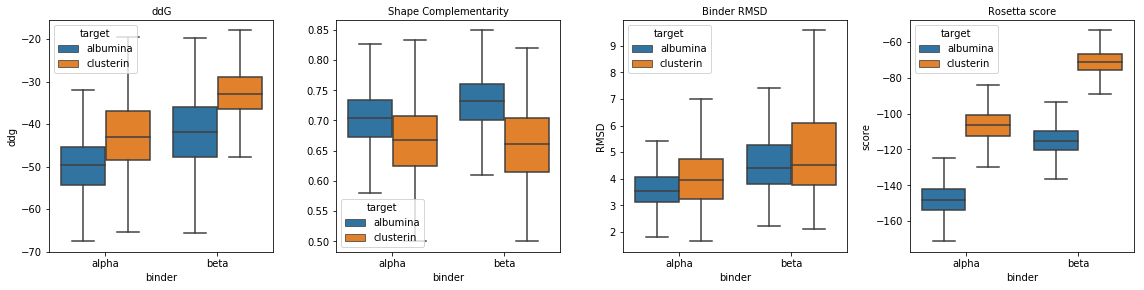

In [3]:
fig = plt.figure(figsize=(16, 4))

ax00 = plt.subplot2grid((1, 4), (0, 0))
ax01 = plt.subplot2grid((1, 4), (0, 1))
ax02 = plt.subplot2grid((1, 4), (0, 2))
ax03 = plt.subplot2grid((1, 4), (0, 3))


wdf = df[df['binder'] != 'lid']

_ = sns.boxplot( 'binder', 'ddg',   'target', data=wdf, ax=ax00, showfliers=False )
rs.utils.add_top_title(ax00, 'ddG')
_ = sns.boxplot( 'binder', 'shape', 'target', data=wdf, ax=ax01, showfliers=False )
rs.utils.add_top_title(ax01, 'Shape Complementarity')
ax01.set_ylabel('')
_ = sns.boxplot( 'binder', 'RMSDB', 'target', data=wdf, ax=ax02, showfliers=False )
rs.utils.add_top_title(ax02, 'Binder RMSD')
ax02.set_ylabel('RMSD')
_ = sns.boxplot( 'binder', 'score', 'target', data=wdf, ax=ax03, showfliers=False )
rs.utils.add_top_title(ax03, 'Rosetta score')

plt.tight_layout()
plt.savefig('images/distributions_clusterin.svg')
plt.show()

In [4]:
stat, p = stats.mannwhitneyu(df[(df['binder']=='alpha') & (df['target']=='albumina')]['ddg'],
                             df[(df['binder']=='alpha') & (df['target']=='clusterin')]['ddg'])
print('ddG - amyloid in alpha - Statistics=%.3f, p=%.3f' % (stat, p))
stat, p = stats.mannwhitneyu(df[(df['binder']=='beta') & (df['target']=='albumina')]['ddg'],
                             df[(df['binder']=='beta') & (df['target']=='clusterin')]['ddg'])
print('ddG - amyloid in beta - Statistics=%.3f, p=%.3f' % (stat, p))

stat, p = stats.mannwhitneyu(df[(df['binder']=='alpha') & (df['target']=='albumina')]['shape'],
                             df[(df['binder']=='alpha') & (df['target']=='clusterin')]['shape'])
print('shape - amyloid in alpha - Statistics=%.3f, p=%.3f' % (stat, p))
stat, p = stats.mannwhitneyu(df[(df['binder']=='beta') & (df['target']=='albumina')]['shape'],
                             df[(df['binder']=='beta') & (df['target']=='clusterin')]['shape'])
print('shape - amyloid in beta - Statistics=%.3f, p=%.3f' % (stat, p))



ddG - amyloid in alpha - Statistics=14154507.500, p=0.000
ddG - amyloid in beta - Statistics=8729292.500, p=0.000
shape - amyloid in alpha - Statistics=17414771.000, p=0.000
shape - amyloid in beta - Statistics=9012033.500, p=0.000


## Albumina Lid

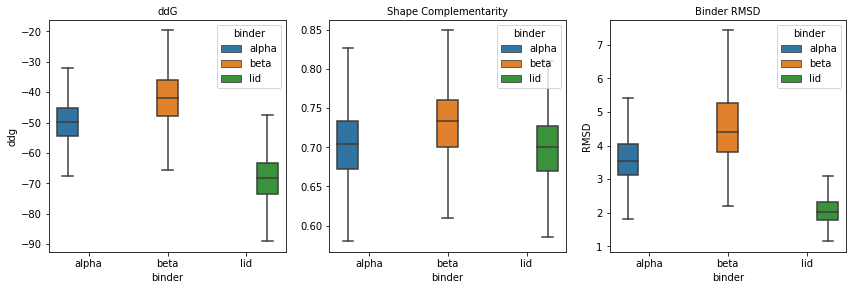

In [5]:
fig = plt.figure(figsize=(12, 4))

ax00 = plt.subplot2grid((1, 3), (0, 0))
ax01 = plt.subplot2grid((1, 3), (0, 1))
ax02 = plt.subplot2grid((1, 3), (0, 2))

wdf = df[df['target'] == 'albumina']

_ = sns.boxplot( 'binder', 'ddg',   'binder', data=wdf, ax=ax00, showfliers=False )
rs.utils.add_top_title(ax00, 'ddG')
_ = sns.boxplot( 'binder', 'shape', 'binder', data=wdf, ax=ax01, showfliers=False )
rs.utils.add_top_title(ax01, 'Shape Complementarity')
ax01.set_ylabel('')
_ = sns.boxplot( 'binder', 'RMSDB', 'binder', data=wdf, ax=ax02, showfliers=False )
rs.utils.add_top_title(ax02, 'Binder RMSD')
ax02.set_ylabel('RMSD')


plt.tight_layout()
plt.savefig('images/distributions.svg')
plt.show()

## Select Top 200
A silent file with this top 200 will be added to the repo

In [6]:
top_alpha = df[(df['binder']=='alpha') & (df['target']=='albumina')].sort_values(['ddg', 'shape']).head(200)
with open('docking/amyloid_alpha/top200.list', 'w') as fd:
    fd.write('\n'.join(top_alpha['description']))
top_clpha = df[(df['binder']=='alpha') & (df['target']=='clusterin')].sort_values(['ddg', 'shape']).head(200)
with open('docking/clust_alpha/top200.list', 'w') as fd:
    fd.write('\n'.join(top_clpha['description']))
top_beta  = df[(df['binder']=='beta') & (df['target']=='albumina')].sort_values(['ddg', 'shape']).head(200)
with open('docking/amyloid_beta/top200.list', 'w') as fd:
    fd.write('\n'.join(top_beta['description']))
top_ceta  = df[(df['binder']=='beta') & (df['target']=='clusterin')].sort_values(['ddg', 'shape']).head(200)
with open('docking/clust_beta/top200.list', 'w') as fd:
    fd.write('\n'.join(top_ceta['description']))

# Name Top 5 for Image

In [7]:
print(top_alpha.sort_values('ddg')[['description', 'ddg', 'shape']].head(5).values)
print(top_clpha.sort_values('ddg')[['description', 'ddg', 'shape']].head(5).values)
print(top_beta.sort_values('ddg')[['description', 'ddg', 'shape']].head(5).values)
print(top_ceta.sort_values('ddg')[['description', 'ddg', 'shape']].head(5).values)

[['alpha124_0006' -78.275 0.632]
 ['alpha385_0010' -75.73 0.716]
 ['alpha53_0005' -75.002 0.748]
 ['alpha635_0009' -74.754 0.762]
 ['alpha609_0006' -74.049 0.718]]
[['clust_alpha_0465_4' -68.686 0.668]
 ['clust_alpha_0404_6' -67.796 0.644]
 ['clust_alpha_0378' -66.574 0.707]
 ['clust_alpha_0283_9' -66.162 0.701]
 ['clust_alpha_0413_3' -65.382 0.626]]
[['beta122_0001' -79.491 0.728]
 ['beta568_0006' -75.181 0.702]
 ['beta93_0001' -75.082 0.665]
 ['beta166_0003' -74.597 0.736]
 ['beta341_0010' -74.359 0.774]]
[['clust_beta_0239_8' -58.369 0.671]
 ['clust_beta_0387_8' -55.047 0.602]
 ['clust_beta_0235_10' -54.664 0.641]
 ['clust_beta_0313_3' -54.481 0.615]
 ['clust_beta_0389_4' -54.214 0.728]]


## Key Residues in Albumina C-terminal

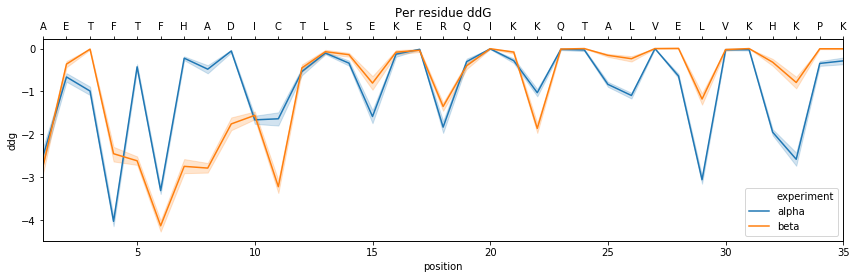

In [8]:
def expand_per_res(row):
    data = []
    for i, x in enumerate(list(row['residue_ddg_'])[:35]):
        data.append([i+1, x])
    return pd.DataFrame({'ddg': list(row['residue_ddg_'])[:35], 'position': list(range(1, 36))})

ddg_alpha = pd.concat(list(top_alpha.apply(lambda row: expand_per_res(row), axis=1)))
ddg_alpha = rs.utils.add_column(ddg_alpha, 'experiment', 'alpha')
ddg_beta  = pd.concat(list(top_beta.apply(lambda row: expand_per_res(row), axis=1)))
ddg_beta  = rs.utils.add_column(ddg_beta, 'experiment', 'beta')
ddgs = pd.concat([ddg_alpha, ddg_beta])
fig = plt.figure(figsize=(12, 4))
ax00 = plt.subplot2grid((1, 1), (0, 0))
_ = sns.lineplot(x="position", y="ddg", hue='experiment', data=ddgs, ax=ax00)
ax00.set_xlim(1, 35)
ax00top = ax00.twiny()
ax00top.set_xticks(range(0, 35))
ax00top.set_xticklabels(list('AETFTFHADICTLSEKERQIKKQTALVELVKHKPK'))
plt.title('Per residue ddG', y=1.08)
plt.tight_layout()
plt.savefig('images/residue_ddg.svg')
plt.show()